In [49]:
# 下載檔案
import os
import zipfile
import urllib.request
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

local_zip = './cats_and_dogs_filtered.zip'
print("Downloading dataset")
urllib.request.urlretrieve(url, local_zip)
print("Complete")

os.makedirs('./', exist_ok=True)

with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('./')
    
os.remove(local_zip)

Complete


In [50]:
import tensorflow as tf
import numpy as np
# 訓練集跟測試集
image_size = (224, 224)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./cats_and_dogs_filtered/train",
    seed = 1337,
    image_size = image_size,
    label_mode = "binary",
    batch_size = 20
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./cats_and_dogs_filtered/validation",
    seed = 1337,
    image_size = image_size,
    label_mode = "binary",
    batch_size = 20
)
# normalize: 0 ~ 255 -> 0 ~ 1
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# check normalization
# image_batch, labels_batch = next(iter(train_ds))
# first_image = image_batch[0]
# print(np.min(first_image), np.max(first_image))


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [51]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout
from keras.layers import Activation, Flatten, Input
def buildModel(type):
    if(type == 'B'):
        model = Sequential([
            Conv2D(4, (3, 3), activation = 'relu', padding = 'same', input_shape=(224, 224, 3)),
            Conv2D(4, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Conv2D(8, (3, 3), activation = 'relu', padding = 'same'),
            Conv2D(8, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Conv2D(16, (3, 3), activation = 'relu', padding = 'same'),
            Conv2D(16, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
            Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
            Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Flatten(),
            Dense(128, activation = 'relu'),
            Dense(64, activation = 'relu'),
            Dense(1, activation = 'sigmoid')
        ])
        return model
    elif(type == 'A'):
        model = Sequential([
            Conv2D(4, (3, 3), activation = 'relu', padding = 'same', input_shape=(224, 224, 3)),
            MaxPooling2D((2, 2), strides=(2,2)),
            Conv2D(8, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Conv2D(16, (3, 3), activation = 'relu', padding = 'same'),
            Conv2D(16, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
            Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
            Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
            MaxPooling2D((2, 2), strides=(2,2)),
            Flatten(),
            Dense(128, activation = 'relu'),
            Dense(64, activation = 'relu'),
            Dense(1, activation = 'sigmoid')
        ])
        return model
    pass

In [61]:
model = buildModel('A')
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
momentum = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=momentum, loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(train_ds, epochs=40, validation_data=val_ds,verbose=1)

Epoch 1/40
100/100 [==============================] - 4s 33ms/step - loss: 0.6929 - accuracy: 0.4985 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/40
100/100 [==============================] - 3s 30ms/step - loss: 0.6925 - accuracy: 0.5025 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/40
100/100 [==============================] - 3s 30ms/step - loss: 0.6921 - accuracy: 0.5475 - val_loss: 0.6916 - val_accuracy: 0.5050
Epoch 4/40
100/100 [==============================] - 3s 30ms/step - loss: 0.6916 - accuracy: 0.5470 - val_loss: 0.6909 - val_accuracy: 0.5310
Epoch 5/40
100/100 [==============================] - 3s 30ms/step - loss: 0.6909 - accuracy: 0.5835 - val_loss: 0.6899 - val_accuracy: 0.5710
Epoch 6/40
100/100 [==============================] - 3s 29ms/step - loss: 0.6898 - accuracy: 0.5755 - val_loss: 0.6885 - val_accuracy: 0.5750
Epoch 7/40
100/100 [==============================] - 3s 29ms/step - loss: 0.6886 - accuracy: 0.5790 - val_loss: 0.6864 - val_accuracy: 0.5610

In [ ]:
model.save("A.h5")
model.evaluate(val_ds, verbose=1)

50/50 [==============================] - 1s 15ms/step - loss: 0.6316 - accuracy: 0.6270


[0.631631076335907, 0.6269999742507935]

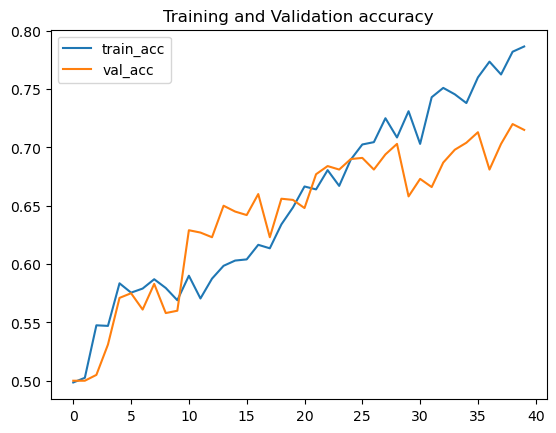

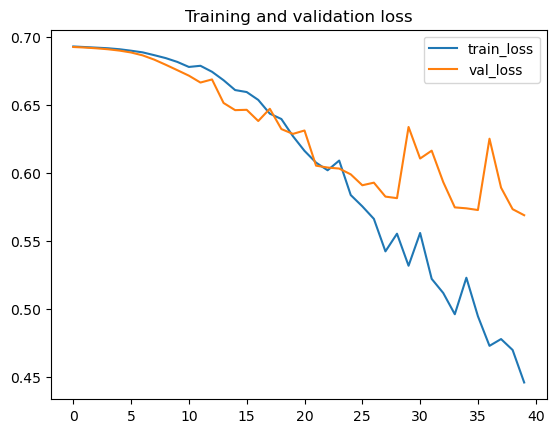

In [62]:
import matplotlib.pyplot as plt
from keras.utils import img_to_array, load_img
model = tf.keras.models.load_model("A.h5")
# get the training detail
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(acc))

# x, y, label
plt.plot(epochs, acc, label = "train_acc")
plt.plot(epochs, val_acc, label = "val_acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.savefig("A_acc")
plt.figure()

plt.plot(epochs, loss, label="train_loss")
plt.plot(epochs, val_loss, label="val_loss")
plt.title("Training and validation loss")
plt.legend()
plt.savefig("A_loss")


1/1 [==============================] - 0s 124ms/step
It is a cat.
Result = 0.446657
Test time:0.180784 second.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_28544\1602698056.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Result = %f" %result)


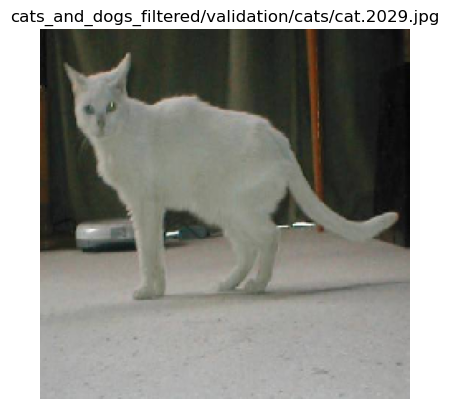

In [55]:
animal = "cat" # cat / dog
index = 2029 # 2000 ~ 2499
img_path = f"cats_and_dogs_filtered/validation/{animal}s/{animal}.{index}.jpg"
img = load_img(img_path, target_size=(224, 224))
plt.title(img_path)
plt.axis("off")
plt.imshow(img)

# make the data same as train_ds
img_np = img_to_array(img)
img_np = img_np.reshape((1,) + img_np.shape)
img_np /= 255

import time
start = time.time()
result = model.predict(img_np)
if(result < 0.5):
    print("It is a cat.")
else:
    print("It is a dog.")
finish = time.time()
print("Result = %f" %result)
print("Test time:%f second." %(finish - start))